In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate

import time

from math import *

In [2]:
weight=10

W=2*np.pi
dw=0.1*weight
T=(2*np.pi)/W
n=25
L=n*T

N_grid=10000
t=np.linspace(0,L,N_grid)
h=t[1]-t[0]

In [3]:
p=int(round(T/h))

st=200
fn=9799

In [12]:
sample=75
q_s=[]
q2_s=[]

M=1.5


# здесь можно подумать над тем, как мы его инициализируем
alpha=.99999
sigma=1
mu=0.1
xi=sigma*np.random.randn(N_grid)+mu

for jj in range(sample):
    start=time.time()
    k0=np.zeros(N_grid, np.dtype(float))
    for i in range(N_grid):
        if i==0:
            k0[i]=M*2*dw
        else:
            #k0[i]=alpha*k0[i-1]+np.sqrt(h)*xi[i-1]
            dif=np.random.normal(0, np.sqrt(h)*sigma)
            k0[i]=alpha*k0[i-1]+dif
            if k0[i]<0:
                k0[i]=2*k0[i-1]-k0[i]

    k0_f=interpolate.interp1d(t, k0, bounds_error=False, fill_value="extrapolate")
    f=lambda t, x: 2*dw-k0_f(t)*sin(x)

    init=np.arcsin(2*dw/k0[0])

    theta=[0]*N_grid
    for i in range(N_grid):
        if i==0:
            theta[i]=init
        else:
            k1=f(t[i-1], theta[i-1])*h
            k2=f(t[i-1]+h/2, theta[i-1]+k1/2)*h
            k3=f(t[i-1]+h/2, theta[i-1]+k2/2)*h
            k4=f(t[i-1]+h, theta[i-1]+k3)*h

            theta[i]=theta[i-1]+(k1+2*k2+2*k3+k4)/6

    theta=np.array(theta)
    x0=np.sin(W*t)
    y0=np.sin(W*t+theta)

    C_0=[0]*N_grid

    for i in range(N_grid):
        if (t[i]-T/2>=0) and (t[i]+T/2<=L):
            C_0[i]=np.corrcoef(x0[i-int(p/2):i+int(p/2)], y0[i-int(p/2):i+int(p/2)])[0][1]
        else:
            C_0[i]=nan

    phi0=np.arccos(C_0)

    k_hat=np.divide(np.array([2*dw]*N_grid), np.sin(phi0))

    mk=np.array([np.mean(k0[st:fn])]*(fn-st))
    sk=(sum(np.multiply(k0[st:fn]-mk, k0[st:fn]-mk)*h))
    q=(sum(np.multiply(k_hat[st:fn]-k0[st:fn], k_hat[st:fn]-k0[st:fn])*h))/sk
    sk2=(sum(np.multiply(k0[st:fn], k0[st:fn])*h))
    q2=(sum(np.multiply(k_hat[st:fn]-k0[st:fn], k_hat[st:fn]-k0[st:fn])*h))/sk2
    q_s.append(q)
    q2_s.append(q2)
    stop=time.time()
    print(jj, ' ----- ', stop-start)

0  -----  4.771080255508423
1  -----  4.9868950843811035
2  -----  4.792670965194702
3  -----  4.7462522983551025
4  -----  4.806928634643555
5  -----  4.800231218338013
6  -----  4.747542858123779
7  -----  4.856512546539307
8  -----  4.864098072052002
9  -----  4.774118661880493
10  -----  4.772503852844238
11  -----  4.7611918449401855
12  -----  4.765388250350952
13  -----  4.770230293273926
14  -----  4.774411678314209
15  -----  4.755848407745361
16  -----  4.736785411834717
17  -----  4.9358086585998535
18  -----  4.799213171005249
19  -----  4.788199424743652
20  -----  4.781521558761597
21  -----  4.767761707305908
22  -----  4.92132043838501
23  -----  4.9118146896362305
24  -----  4.779136896133423
25  -----  4.743262529373169
26  -----  4.776502370834351
27  -----  4.822707414627075
28  -----  4.784916877746582
29  -----  4.777881383895874
30  -----  4.803213596343994
31  -----  4.770390748977661
32  -----  4.786770820617676
33  -----  4.83086085319519
34  -----  4.75577545

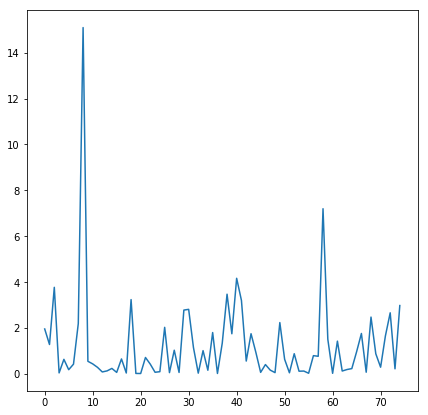

1.24856530024 2.05625705174


In [13]:
plt.figure(figsize=(7,7))
plt.plot(q_s)
plt.show()
q_s=np.array(q_s)
print(np.mean(q_s), np.std(q_s))

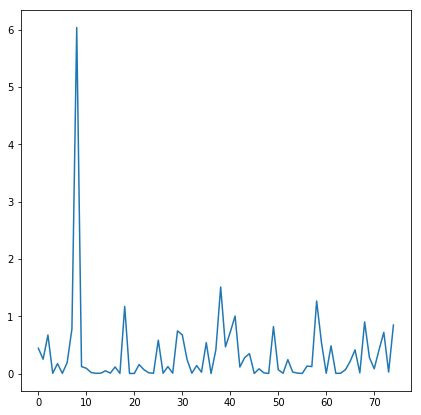

0.34915638402 0.745792019568


In [14]:
plt.figure(figsize=(7,7))
plt.plot(q2_s)
plt.show()
q2_s=np.array(q2_s)
print(np.mean(q2_s), np.std(q2_s))

In [20]:
sample=100
q_s=[]
q2_s=[]

M=1.5


# здесь можно подумать над тем, как мы его инициализируем
alpha=.99999
sigma=.1
mu=0.1
xi=sigma*np.random.randn(N_grid)+mu

for jj in range(sample):
    start=time.time()
    k0=np.zeros(N_grid, np.dtype(float))
    for i in range(N_grid):
        if i==0:
            k0[i]=M*2*dw
        else:
            #k0[i]=alpha*k0[i-1]+np.sqrt(h)*xi[i-1]
            dif=np.random.normal(0, np.sqrt(h)*sigma)
            k0[i]=alpha*k0[i-1]+dif
            if k0[i]<0:
                k0[i]=2*k0[i-1]-k0[i]

    k0_f=interpolate.interp1d(t, k0, bounds_error=False, fill_value="extrapolate")
    f=lambda t, x: 2*dw-k0_f(t)*sin(x)

    init=np.arcsin(2*dw/k0[0])

    theta=[0]*N_grid
    for i in range(N_grid):
        if i==0:
            theta[i]=init
        else:
            k1=f(t[i-1], theta[i-1])*h
            k2=f(t[i-1]+h/2, theta[i-1]+k1/2)*h
            k3=f(t[i-1]+h/2, theta[i-1]+k2/2)*h
            k4=f(t[i-1]+h, theta[i-1]+k3)*h

            theta[i]=theta[i-1]+(k1+2*k2+2*k3+k4)/6

    theta=np.array(theta)
    x0=np.sin(W*t)
    y0=np.sin(W*t+theta)

    C_0=[0]*N_grid

    for i in range(N_grid):
        if (t[i]-T/2>=0) and (t[i]+T/2<=L):
            C_0[i]=np.corrcoef(x0[i-int(p/2):i+int(p/2)], y0[i-int(p/2):i+int(p/2)])[0][1]
        else:
            C_0[i]=nan

    phi0=np.arccos(C_0)

    k_hat=np.divide(np.array([2*dw]*N_grid), np.sin(phi0))

    mk=np.array([np.mean(k0[st:fn])]*(fn-st))
    sk=(sum(np.multiply(k0[st:fn]-mk, k0[st:fn]-mk)*h))
    q=(sum(np.multiply(k_hat[st:fn]-k0[st:fn], k_hat[st:fn]-k0[st:fn])*h))/sk
    sk2=(sum(np.multiply(k0[st:fn], k0[st:fn])*h))
    q2=(sum(np.multiply(k_hat[st:fn]-k0[st:fn], k_hat[st:fn]-k0[st:fn])*h))/sk2
    q_s.append(q)
    q2_s.append(q2)
    stop=time.time()
    print(jj, ' ----- ', stop-start)

0  -----  10.910908222198486
1  -----  9.949490308761597
2  -----  10.144055366516113
3  -----  10.932829141616821
4  -----  11.180922508239746
5  -----  12.3427734375
6  -----  11.50814962387085
7  -----  11.33178424835205
8  -----  10.674411535263062
9  -----  10.720611095428467
10  -----  10.122169256210327
11  -----  10.615939617156982
12  -----  10.451937675476074
13  -----  11.518017053604126
14  -----  10.387156963348389
15  -----  10.638654708862305
16  -----  10.371958494186401
17  -----  10.367347717285156
18  -----  10.5434250831604
19  -----  10.629231691360474
20  -----  10.629535436630249
21  -----  10.33450961112976
22  -----  10.492745637893677
23  -----  10.50875449180603
24  -----  10.970964431762695
25  -----  11.471627473831177
26  -----  10.760037422180176
27  -----  11.120420217514038
28  -----  10.529492378234863
29  -----  10.73464822769165
30  -----  10.512959957122803
31  -----  10.694020748138428
32  -----  10.704464197158813
33  -----  10.557939291000366
34 

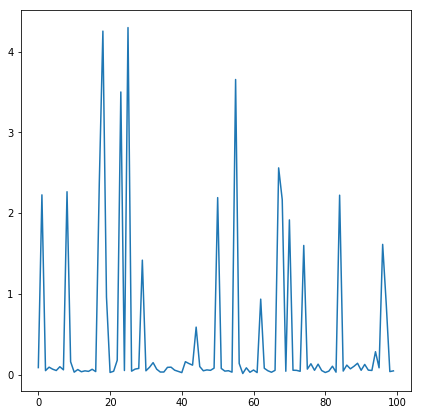

0.472567668876 0.952874664463


In [21]:
plt.figure(figsize=(7,7))
plt.plot(q_s)
plt.show()
q_s=np.array(q_s)
print(np.mean(q_s), np.std(q_s))

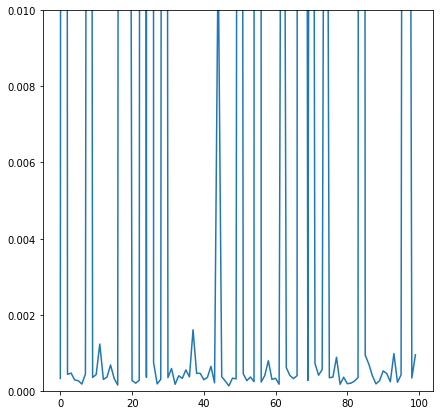

0.029693206497 0.102035666936


In [22]:
plt.figure(figsize=(7,7))
plt.ylim(0, 0.01)
plt.plot(q2_s)
plt.show()
q2_s=np.array(q2_s)
print(np.mean(q2_s), np.std(q2_s))

In [23]:
sample=100
q_s=[]
q2_s=[]

M=1.5


# здесь можно подумать над тем, как мы его инициализируем
alpha=.99999
sigma=.01
mu=0.1
xi=sigma*np.random.randn(N_grid)+mu

for jj in range(sample):
    start=time.time()
    k0=np.zeros(N_grid, np.dtype(float))
    for i in range(N_grid):
        if i==0:
            k0[i]=M*2*dw
        else:
            #k0[i]=alpha*k0[i-1]+np.sqrt(h)*xi[i-1]
            dif=np.random.normal(0, np.sqrt(h)*sigma)
            k0[i]=alpha*k0[i-1]+dif
            if k0[i]<0:
                k0[i]=2*k0[i-1]-k0[i]

    k0_f=interpolate.interp1d(t, k0, bounds_error=False, fill_value="extrapolate")
    f=lambda t, x: 2*dw-k0_f(t)*sin(x)

    init=np.arcsin(2*dw/k0[0])

    theta=[0]*N_grid
    for i in range(N_grid):
        if i==0:
            theta[i]=init
        else:
            k1=f(t[i-1], theta[i-1])*h
            k2=f(t[i-1]+h/2, theta[i-1]+k1/2)*h
            k3=f(t[i-1]+h/2, theta[i-1]+k2/2)*h
            k4=f(t[i-1]+h, theta[i-1]+k3)*h

            theta[i]=theta[i-1]+(k1+2*k2+2*k3+k4)/6

    theta=np.array(theta)
    x0=np.sin(W*t)
    y0=np.sin(W*t+theta)

    C_0=[0]*N_grid

    for i in range(N_grid):
        if (t[i]-T/2>=0) and (t[i]+T/2<=L):
            C_0[i]=np.corrcoef(x0[i-int(p/2):i+int(p/2)], y0[i-int(p/2):i+int(p/2)])[0][1]
        else:
            C_0[i]=nan

    phi0=np.arccos(C_0)

    k_hat=np.divide(np.array([2*dw]*N_grid), np.sin(phi0))

    mk=np.array([np.mean(k0[st:fn])]*(fn-st))
    sk=(sum(np.multiply(k0[st:fn]-mk, k0[st:fn]-mk)*h))
    q=(sum(np.multiply(k_hat[st:fn]-k0[st:fn], k_hat[st:fn]-k0[st:fn])*h))/sk
    sk2=(sum(np.multiply(k0[st:fn], k0[st:fn])*h))
    q2=(sum(np.multiply(k_hat[st:fn]-k0[st:fn], k_hat[st:fn]-k0[st:fn])*h))/sk2
    q_s.append(q)
    q2_s.append(q2)
    stop=time.time()
    print(jj, ' ----- ', stop-start)

0  -----  9.707885503768921
1  -----  9.584024667739868
2  -----  9.212855100631714
3  -----  9.405105590820312
4  -----  9.628251552581787
5  -----  9.530578136444092
6  -----  9.331064939498901
7  -----  9.371155261993408
8  -----  9.332857608795166
9  -----  10.193005084991455
10  -----  9.570998668670654
11  -----  9.171210765838623
12  -----  9.53785753250122
13  -----  9.644346952438354
14  -----  9.376901388168335
15  -----  9.23658013343811
16  -----  11.126750707626343
17  -----  9.52098298072815
18  -----  9.346543073654175
19  -----  9.33786678314209
20  -----  9.227463006973267
21  -----  9.201053380966187
22  -----  9.451937913894653
23  -----  9.635127067565918
24  -----  9.674259901046753
25  -----  10.039837121963501
26  -----  10.483662366867065
27  -----  9.941032648086548
28  -----  9.434999465942383
29  -----  11.50707197189331
30  -----  12.983598470687866
31  -----  10.989455938339233
32  -----  9.941837072372437
33  -----  10.020969152450562
34  -----  9.68270802

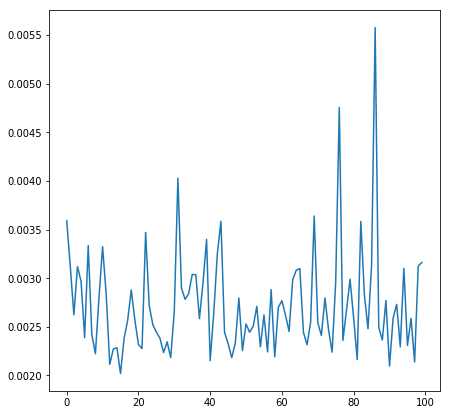

0.00272270308072 0.000537453622782


In [24]:
plt.figure(figsize=(7,7))
plt.plot(q_s)
plt.show()
q_s=np.array(q_s)
print(np.mean(q_s), np.std(q_s))

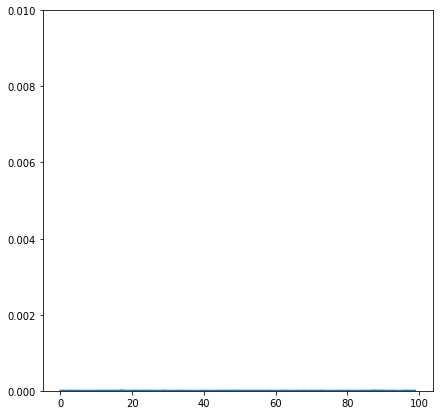

8.83640265629e-06 2.06332224795e-06


In [25]:
plt.figure(figsize=(7,7))
plt.ylim(0, 0.01)
plt.plot(q2_s)
plt.show()
q2_s=np.array(q2_s)
print(np.mean(q2_s), np.std(q2_s))